DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


length of left boundary:  1.01171875
circumference of disk:  1.25461939622
Area:  3.87514219391


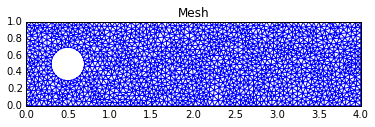

In [29]:
%matplotlib inline
%run /home/fenics/fenics-matplotlib.py
from IPython.display import display, clear_output; 

# Important modules, the ones above are only for visualization 
from mshr import *; 
from dolfin import *; 

# Define domain
XMIN, XMAX = 0, 4.; 
YMIN, YMAX = 0, 1.; 
G = [XMIN, XMAX, YMIN, YMAX];
r = 0.2;
x_c, y_c = 0.5, 0.5; 

# Generate domain and mesh
mresolution = 50
domain = Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - Circle(Point(x_c, y_c), r)
mesh = generate_mesh(domain, mresolution)

# Visualize the mesh
plt.triplot(mesh2triang(mesh)); 
plt.title("Mesh");
plt.axis('scaled');

# Mark left boundary of the mesh
eps = 1e-5
mk_left = Expression("x[0] < XMIN + eps ? 1. : 0.", XMIN=XMIN, eps=eps, domain=mesh, degree=3)

# Compute line integral
l_left = assemble(mk_left*ds)

print "length of left boundary: ", l_left

# Mark left hole circumference 
eps = 1e-5
mk_circ = Expression("pow(x[0]-x_c,2) + pow(x[1]-y_c,2) - pow(r,2) < eps ? 1. : 0.", x_c=x_c, y_c=y_c, r=r, eps=eps, domain=mesh, degree=3)

# Compute line integral
l_circ = assemble(mk_circ*ds)

print "circumference of disk: ", l_circ

# Compute volume integral
one = Expression('1.0',domain=mesh, degree=3);
A = assemble(one*dx) 

print "Area: ", A